In [1]:
# Cell 1 — imports + helpers (Polars)
import polars as pl
import numpy as np
import re
# Visualization of the dataframe
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import style
style.mpl_apply()

In [2]:
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# pair_ohe = pl.read_parquet(path + "pair_ohe_full.parquet")

In [3]:
merge = pl.read_parquet(path + "merge_clean_df.parquet")

In [10]:
merge

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Infection""","""Infections and infestations""","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Rash""","""Skin and subcutaneous tissue d…","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Cyanosis""","""Vascular disorders""","""Infection""","""cefazolin""",57.0,93.2,null,null
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime""",3.0,null,null,24.0
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime salt not specified""",3.0,null,null,24.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Drug hypersensitivity""","""Immune system disorders""","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Chest pain""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Asthma""","""Respiratory, thoracic and medi…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0


In [19]:
# seect REPORT_ID and DATRECEIVED
data = merge.select(["REPORT_ID", "DATRECEIVED"])
# keep only the first reprort_id if there are multiple
data = data.unique(subset=["REPORT_ID"])
data

REPORT_ID,DATRECEIVED
i64,date
907901888,2025-03-10
901073392,2022-07-15
904131619,2021-05-10
1139101,2025-02-25
454477,2012-08-01
…,…
907722539,2024-12-16
907918772,2025-05-13
902820020,2019-10-02


In [20]:
# get the distribution of DATERECEIVED by year, right now they are in YYYMMDD format
dates = data.select("DATRECEIVED").to_series().to_list()
years = [int(str(date)[:4]) for date in dates]
year_counts = np.unique(years, return_counts=True)
year_counts

(array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]),
 array([  2, 105, 107, 126,  88, 120, 165, 158, 139, 154, 233, 281, 599,
        549, 527, 582, 582, 614, 356]))

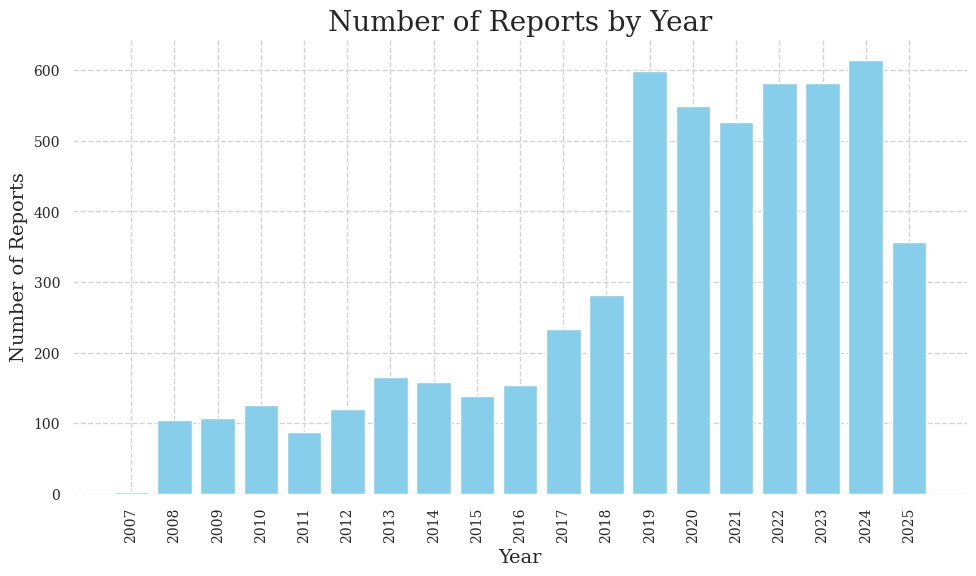

In [21]:
# plot the year counts
plt.figure(figsize=(10, 6))
plt.bar(year_counts[0], year_counts[1], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.xticks(year_counts[0], rotation=90)
plt.title("Number of Reports by Year")
plt.savefig('visualizations/canada/00_05.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [7]:
data = merge.select([
    "REPORT_ID",
    "GENDER_CODE",
    "DISABILITY",
    "CONGENITAL_ANOMALY",
    "OTHER_MEDICALLY_IMP_COND",
    "AGE_Y",
    "WEIGHT_KG",
    "HEIGHT_CM"])

In [9]:
data

REPORT_ID,GENDER_CODE,DISABILITY,CONGENITAL_ANOMALY,OTHER_MEDICALLY_IMP_COND,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,str,i8,i8,i8,f64,f64,f64
305014,"""M""",null,null,1,57.0,93.2,null
305014,"""M""",null,null,1,57.0,93.2,null
305014,"""M""",null,null,1,57.0,93.2,null
303952,"""F""",null,null,null,3.0,null,null
303952,"""F""",null,null,null,3.0,null,null
…,…,…,…,…,…,…,…
907353481,"""F""",2,2,1,65.0,34.0,null
907353481,"""F""",2,2,1,65.0,34.0,null
907353481,"""F""",2,2,1,65.0,34.0,null


# Canada Census

In [29]:
import pandas as pd

# delimited by ;
canada_census = pd.read_csv("data/raw/98100022.csv", delimiter=';')
canada_census

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Année de recensement (2),"Âge (en années), âge moyen et âge médian (128)",Coordonnée,Genre (3a):Total - Genre[1],Symbole,Genre (3a):Hommes+[2],Symbole.1,Genre (3a):Femmes+[3],Symbole.2
0,2021,Canada,2021A000011124,2021,Total - Âge,1.1.1,36991980.0,NaN,18226240.0,NaN,18765740.0,NaN
1,2021,Canada,2021A000011124,2021,0 à 14 ans,1.1.2,6012795.0,NaN,3086510.0,NaN,2926285.0,NaN
2,2021,Canada,2021A000011124,2021,0 à 4 ans,1.1.3,1831195.0,NaN,938790.0,NaN,892410.0,NaN
3,2021,Canada,2021A000011124,2021,Moins de 1 an,1.1.4,343135.0,NaN,176395.0,NaN,166740.0,NaN
4,2021,Canada,2021A000011124,2021,1,1.1.5,355385.0,NaN,181860.0,NaN,173525.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1399803,2021,"Kitikmeot, Unorganized",2021A00056208098,2016,98,5468.2.124,0.0,...,0.0,...,0.0,...
1399804,2021,"Kitikmeot, Unorganized",2021A00056208098,2016,99,5468.2.125,0.0,...,0.0,...,0.0,...
1399805,2021,"Kitikmeot, Unorganized",2021A00056208098,2016,100 ans et plus,5468.2.126,0.0,...,0.0,...,0.0,...
1399806,2021,"Kitikmeot, Unorganized",2021A00056208098,2016,Âge moyen,5468.2.127,0.0,...,0.0,...,0.0,...


In [30]:
# keep cols 0, 1, 3, 4,6,8,10
canada_census = canada_census.iloc[:, [0, 1, 3, 4, 6, 8, 10]]
canada_census

,PÉRIODE DE RÉFÉRENCE,GÉO,Année de recensement (2),"Âge (en années), âge moyen et âge médian (128)",Genre (3a):Total - Genre[1],Genre (3a):Hommes+[2],Genre (3a):Femmes+[3]
0,2021,Canada,2021,Total - Âge,36991980.0,18226240.0,18765740.0
1,2021,Canada,2021,0 à 14 ans,6012795.0,3086510.0,2926285.0
2,2021,Canada,2021,0 à 4 ans,1831195.0,938790.0,892410.0
3,2021,Canada,2021,Moins de 1 an,343135.0,176395.0,166740.0
4,2021,Canada,2021,1,355385.0,181860.0,173525.0
...,...,...,...,...,...,...,...
1399803,2021,"Kitikmeot, Unorganized",2016,98,0.0,0.0,0.0
1399804,2021,"Kitikmeot, Unorganized",2016,99,0.0,0.0,0.0
1399805,2021,"Kitikmeot, Unorganized",2016,100 ans et plus,0.0,0.0,0.0
1399806,2021,"Kitikmeot, Unorganized",2016,Âge moyen,0.0,0.0,0.0


In [32]:
# keep where GEO IS "Canada"
canada_census = canada_census[canada_census['GÉO'] == 'Canada']
canada_census

,PÉRIODE DE RÉFÉRENCE,GÉO,Année de recensement (2),"Âge (en années), âge moyen et âge médian (128)",Genre (3a):Total - Genre[1],Genre (3a):Hommes+[2],Genre (3a):Femmes+[3]
0,2021,Canada,2021,Total - Âge,36991980.0,18226240.0,18765740.0
1,2021,Canada,2021,0 à 14 ans,6012795.0,3086510.0,2926285.0
2,2021,Canada,2021,0 à 4 ans,1831195.0,938790.0,892410.0
3,2021,Canada,2021,Moins de 1 an,343135.0,176395.0,166740.0
4,2021,Canada,2021,1,355385.0,181860.0,173525.0
...,...,...,...,...,...,...,...
251,2021,Canada,2016,98,6705.0,1425.0,5285.0
252,2021,Canada,2016,99,4495.0,880.0,3615.0
253,2021,Canada,2016,100 ans et plus,8230.0,1340.0,6890.0
254,2021,Canada,2016,Âge moyen,41.0,40.1,41.9


In [33]:
# keep mhere Âge (en années), âge moyen et âge médian (128) is numeric
canada_census = canada_census[pd.to_numeric(canada_census['Âge (en années), âge moyen et âge médian (128)'], errors='coerce').notnull()]
canada_census['Âge (en années), âge moyen et âge médian (128)'] = pd.to_numeric(canada_census['Âge (en années), âge moyen et âge médian (128)'])
canada_census

C:\Users\herie\AppData\Local\Temp\ipykernel_34560\1428919657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_census['Âge (en années), âge moyen et âge médian (128)'] = pd.to_numeric(canada_census['Âge (en années), âge moyen et âge médian (128)'])


,PÉRIODE DE RÉFÉRENCE,GÉO,Année de recensement (2),"Âge (en années), âge moyen et âge médian (128)",Genre (3a):Total - Genre[1],Genre (3a):Hommes+[2],Genre (3a):Femmes+[3]
4,2021,Canada,2021,1,355385.0,181860.0,173525.0
5,2021,Canada,2021,2,365325.0,186860.0,178465.0
6,2021,Canada,2021,3,377035.0,193235.0,183800.0
7,2021,Canada,2021,4,390315.0,200445.0,189870.0
9,2021,Canada,2021,5,402100.0,205950.0,196155.0
...,...,...,...,...,...,...,...
248,2021,Canada,2016,95,20980.0,5365.0,15615.0
249,2021,Canada,2016,96,14855.0,3505.0,11355.0
250,2021,Canada,2016,97,9485.0,2075.0,7410.0
251,2021,Canada,2016,98,6705.0,1425.0,5285.0


In [36]:
# view the unique values in the loc 0 column
canada_census.iloc[:, 2].unique()

array([2021, 2016])

In [37]:
canada2021 = canada_census[canada_census['Année de recensement (2)'] == 2021]
canada2016 = canada_census[canada_census['Année de recensement (2)'] == 2016]

In [38]:
canada2021

,PÉRIODE DE RÉFÉRENCE,GÉO,Année de recensement (2),"Âge (en années), âge moyen et âge médian (128)",Genre (3a):Total - Genre[1],Genre (3a):Hommes+[2],Genre (3a):Femmes+[3]
4,2021,Canada,2021,1,355385.0,181860.0,173525.0
5,2021,Canada,2021,2,365325.0,186860.0,178465.0
6,2021,Canada,2021,3,377035.0,193235.0,183800.0
7,2021,Canada,2021,4,390315.0,200445.0,189870.0
9,2021,Canada,2021,5,402100.0,205950.0,196155.0
...,...,...,...,...,...,...,...
120,2021,Canada,2021,95,25450.0,7240.0,18205.0
121,2021,Canada,2021,96,16320.0,4250.0,12070.0
122,2021,Canada,2021,97,12125.0,2940.0,9185.0
123,2021,Canada,2021,98,8550.0,1960.0,6595.0


In [39]:
canada2016

,PÉRIODE DE RÉFÉRENCE,GÉO,Année de recensement (2),"Âge (en années), âge moyen et âge médian (128)",Genre (3a):Total - Genre[1],Genre (3a):Hommes+[2],Genre (3a):Femmes+[3]
132,2021,Canada,2016,1,372615.0,190900.0,181710.0
133,2021,Canada,2016,2,378880.0,193935.0,184940.0
134,2021,Canada,2016,3,386200.0,198610.0,187585.0
135,2021,Canada,2016,4,391365.0,200500.0,190865.0
137,2021,Canada,2016,5,394530.0,202495.0,192035.0
...,...,...,...,...,...,...,...
248,2021,Canada,2016,95,20980.0,5365.0,15615.0
249,2021,Canada,2016,96,14855.0,3505.0,11355.0
250,2021,Canada,2016,97,9485.0,2075.0,7410.0
251,2021,Canada,2016,98,6705.0,1425.0,5285.0


In [40]:
# translate 	PÉRIODE DE RÉFÉRENCE	GÉO	Année de recensement (2)	Âge (en années), âge moyen et âge médian (128)	Genre (3a):Total - Genre[1]	Genre (3a):Hommes+[2]	Genre (3a):Femmes+[3]
translate = {
    'PÉRIODE DE RÉFÉRENCE': 'Reference Period',
    'GÉO': 'Geo',
    'Année de recensement (2)': 'Census Year',
    'Âge (en années), âge moyen et âge médian (128)': 'Age',
    'Genre (3a):Total - Genre[1]': 'Total' ,
    'Genre (3a):Hommes+[2]': 'Men',    
    'Genre (3a):Femmes+[3]': 'Women'
}   
canada2021 = canada2021.rename(columns=translate)
canada2016 = canada2016.rename(columns=translate)

In [48]:
# save as parquet in data/processed
canada2021.to_parquet("data/processed/canada_census_2021.parquet")
canada2016.to_parquet("data/processed/canada_census_2016.parquet")

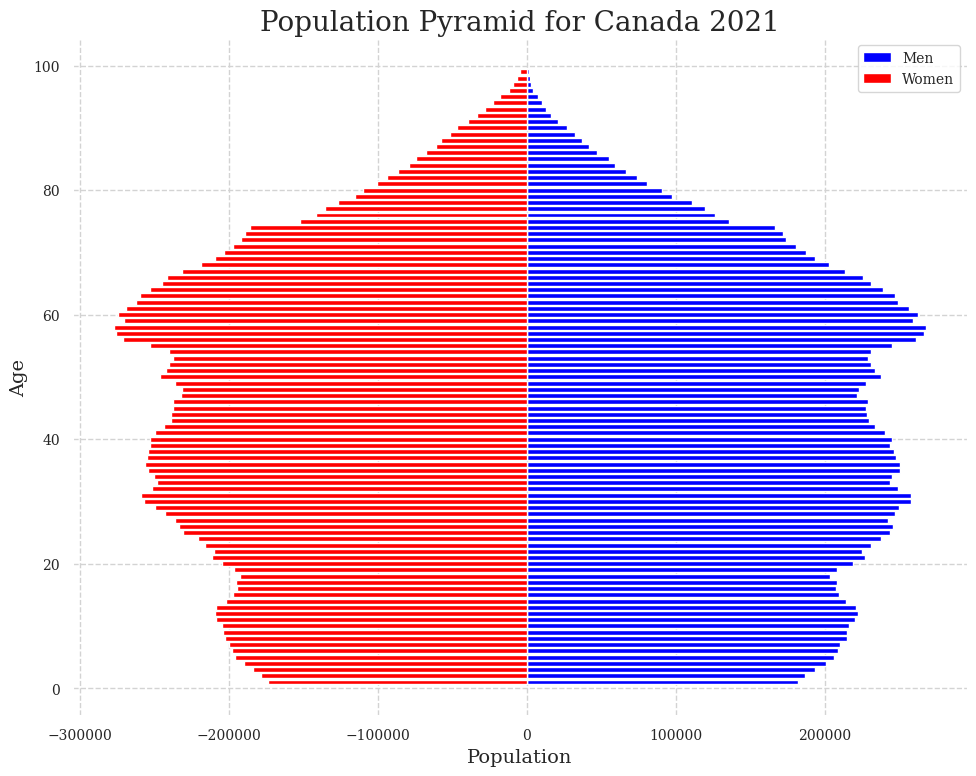

In [49]:
# population pyramid for 2021
plt.figure(figsize=(10, 8))
plt.barh(canada2021['Age'], canada2021['Men'], color='blue', label='Men')
plt.barh(canada2021['Age'], -canada2021['Women'], color='red', label='Women')
plt.xlabel('Population')
plt.ylabel('Age')
plt.title('Population Pyramid for Canada 2021')
plt.legend()
plt.tight_layout()
plt.savefig('visualizations/canada/population_pyramid_2021.pdf', bbox_inches='tight')

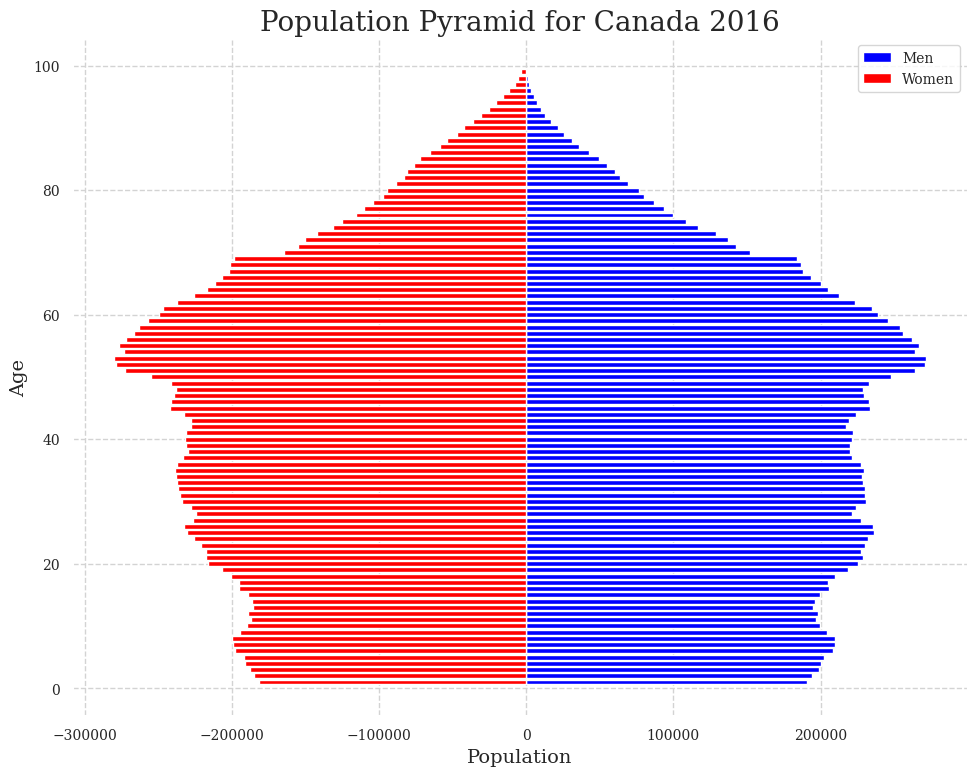

In [50]:
# population pyramid for 2021
plt.figure(figsize=(10, 8))
plt.barh(canada2016['Age'], canada2016['Men'], color='blue', label='Men')
plt.barh(canada2016['Age'], -canada2016['Women'], color='red', label='Women')
plt.xlabel('Population')
plt.ylabel('Age')
plt.title('Population Pyramid for Canada 2016')
plt.legend()
plt.tight_layout()
plt.savefig('visualizations/canada/population_pyramid_2016.pdf', bbox_inches='tight')